## Classification of emotions

In [1]:
import tensorflow as tf
import seaborn as sns
import zipfile
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
tf.__version__

'2.18.0'

## Loading the images

In [2]:
path = "D:/COMPUTER VISION MASTERCLASS/repo/Datasets/fer2013_2_classes.zip"
zip_object = zipfile.ZipFile(file= path, mode= 'r')
zip_object.extractall('D:/COMPUTER VISION MASTERCLASS/Emotion analysis CNN')
zip_object.close()

In [3]:
image = tf.keras.preprocessing.image.load_img('D:/COMPUTER VISION MASTERCLASS/Emotion analysis CNN/fer2013_2_classes/train/Angry/0.jpg')

## Train and test set

In [4]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range = 7,
                                        horizontal_flip = True,
                                        zoom_range =0.2)

training_dataset = training_generator.flow_from_directory('D:/COMPUTER VISION MASTERCLASS/Emotion analysis CNN/fer2013_2_classes/train',
                                                          target_size = (48,48),
                                                          batch_size = 16,
                                                          class_mode = "categorical",
                                                          shuffle = True)

Found 11210 images belonging to 2 classes.


In [5]:
training_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [6]:
training_dataset.class_indices

{'Angry': 0, 'Happy': 1}

In [7]:
np.unique(training_dataset.classes, return_counts= True)

(array([0, 1]), array([3995, 7215], dtype=int64))

<Axes: ylabel='count'>

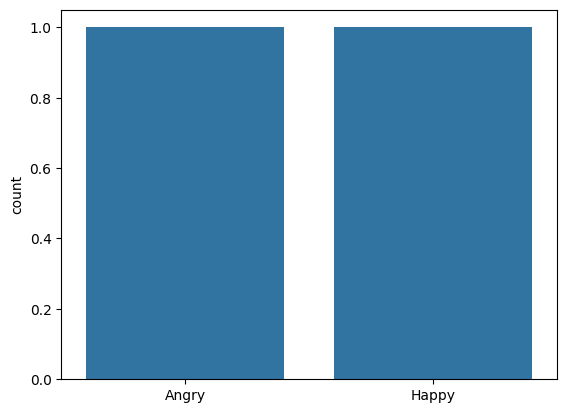

In [8]:
sns.countplot(training_dataset.class_indices)

In [9]:
testing_generator = ImageDataGenerator(rescale = 1./255)
testing_dataset = testing_generator.flow_from_directory('D:/COMPUTER VISION MASTERCLASS/Emotion analysis CNN/fer2013_2_classes/validation',
                                                        target_size = (48, 48),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                        shuffle = False)

Found 1370 images belonging to 2 classes.


In [10]:
testing_dataset.class_indices

{'Angry': 0, 'Happy': 1}

In [11]:
np.unique(testing_dataset.classes, return_counts= True)

(array([0, 1]), array([491, 879], dtype=int64))

## Building the CNN

In [12]:
2*2*2*32

256

In [13]:
num_detectors = 32
num_classes = 2
width, height = 48, 48
epochs = 100

network = Sequential()
network.add(Conv2D(num_detectors, (3,3), activation = 'relu',padding = 'same', input_shape = (width, height, 3)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors, (3,3), activation = 'relu',padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size = (2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors, (3,3), activation = 'relu',padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors, (3,3), activation = 'relu',padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size = (2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors, (3,3), activation = 'relu',padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors, (3,3), activation = 'relu',padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size = (2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*2*num_detectors, (3,3), activation = 'relu',padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors, (3,3), activation = 'relu',padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size = (2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(2*num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2*num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes, activation='softmax'))
network.summary()

C:\Users\245970\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,328,418 (5.07 MB)

 Trainable params: 1,326,242 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

In [14]:
network.compile(optimizer='Adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
network.fit(training_dataset, epochs=10)

Epoch 1/10


C:\Users\245970\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


701/701 ━━━━━━━━━━━━━━━━━━━━ 54s 71ms/step - accuracy: 0.5741 - loss: 0.8194
Epoch 2/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - accuracy: 0.6992 - loss: 0.5753
Epoch 3/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 50s 71ms/step - accuracy: 0.8125 - loss: 0.4186
Epoch 4/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 52s 74ms/step - accuracy: 0.8355 - loss: 0.3761
Epoch 5/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 50s 71ms/step - accuracy: 0.8461 - loss: 0.3566
Epoch 6/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.8598 - loss: 0.3272
Epoch 7/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.8689 - loss: 0.3086
Epoch 8/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.8739 - loss: 0.3097
Epoch 9/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8795 - loss: 0.2972
Epoch 10/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.8503 - loss: 0.3356


## Saving the model

In [16]:
model_json = network.to_json()
with open('network_emotions_2.json', 'w') as json_file:
    json_file.write(model_json)

In [17]:
from keras.models import save_model
network_saved = save_model(network, 'D:/COMPUTER VISION MASTERCLASS/Emotion analysis CNN/weights_emotions_2.hdf5')

In [18]:
with open('network_emotions_2.json' , 'r') as json_file:
    json_saved_model = json_file.read()
json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initialize

In [19]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights_emotions_2.hdf5')
network_loaded.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
network_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,328,418 (5.07 MB)

 Trainable params: 1,326,242 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

## Evaluating the network

In [21]:
network_loaded.evaluate(testing_dataset)

172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8883 - loss: 0.3270


[0.3061312139034271, 0.8773722648620605]

In [22]:
predictions = network_loaded.predict(testing_dataset)
predictions

172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


array([[0.93314636, 0.0668536 ],
       [0.8134203 , 0.18657973],
       [0.77019614, 0.22980389],
       ...,
       [0.15114045, 0.8488595 ],
       [0.00918899, 0.990811  ],
       [0.0501139 , 0.94988614]], dtype=float32)

In [23]:
predictions = np.argmax(predictions, axis =1)
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
testing_dataset.class_indices

{'Angry': 0, 'Happy': 1}

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(testing_dataset.classes, predictions)


0.8773722627737226

<Axes: >

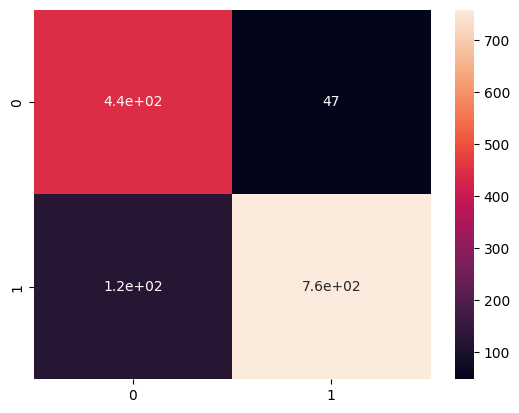

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testing_dataset.classes, predictions)
sns.heatmap(cm, annot = True)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(testing_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       491
           1       0.94      0.86      0.90       879

    accuracy                           0.88      1370
   macro avg       0.86      0.88      0.87      1370
weighted avg       0.89      0.88      0.88      1370



In [28]:
testing_dataset.class_indices

{'Angry': 0, 'Happy': 1}

## Classifying one single image

In [29]:
image = cv2.imread('D:/COMPUTER VISION MASTERCLASS/Emotion analysis CNN/gabriel.png')

In [30]:
image.shape

(300, 400, 3)

In [31]:
cv2.imshow('window', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
face_detector = cv2.CascadeClassifier('D:/COMPUTER VISION MASTERCLASS/Emotion analysis CNN/haarcascade_frontalface_default.xml')

In [33]:
original_image = image.copy()
faces = face_detector.detectMultiScale(original_image)

In [34]:
faces

array([[162,  40, 128, 128]])

In [35]:
roi = image[40:40 + 128, 162:162 + 128]
cv2.imshow('window', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
roi.shape

(128, 128, 3)

In [37]:
roi = cv2.resize(roi, (48, 48))
cv2.imshow('window', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
roi.shape

(48, 48, 3)

In [39]:
roi

array([[[ 28,  32,  37],
        [ 22,  28,  34],
        [ 33,  37,  42],
        ...,
        [ 12,  16,  17],
        [ 16,  21,  25],
        [ 16,  25,  30]],

       [[ 27,  31,  36],
        [ 31,  36,  41],
        [ 32,  36,  41],
        ...,
        [ 11,  16,  19],
        [ 13,  19,  24],
        [ 17,  25,  28]],

       [[ 27,  31,  36],
        [ 30,  34,  39],
        [ 26,  30,  35],
        ...,
        [ 12,  17,  20],
        [ 14,  20,  25],
        [ 20,  25,  27]],

       ...,

       [[162, 185, 197],
        [166, 188, 200],
        [166, 188, 200],
        ...,
        [162, 181, 188],
        [162, 182, 188],
        [161, 180, 187]],

       [[160, 184, 196],
        [165, 187, 199],
        [166, 188, 200],
        ...,
        [161, 180, 187],
        [162, 181, 187],
        [161, 180, 187]],

       [[160, 184, 196],
        [163, 187, 199],
        [165, 187, 199],
        ...,
        [160, 179, 186],
        [161, 180, 187],
        [162, 181, 188]]

In [40]:
roi = roi/255
roi

array([[[0.10980392, 0.1254902 , 0.14509804],
        [0.08627451, 0.10980392, 0.13333333],
        [0.12941176, 0.14509804, 0.16470588],
        ...,
        [0.04705882, 0.0627451 , 0.06666667],
        [0.0627451 , 0.08235294, 0.09803922],
        [0.0627451 , 0.09803922, 0.11764706]],

       [[0.10588235, 0.12156863, 0.14117647],
        [0.12156863, 0.14117647, 0.16078431],
        [0.1254902 , 0.14117647, 0.16078431],
        ...,
        [0.04313725, 0.0627451 , 0.0745098 ],
        [0.05098039, 0.0745098 , 0.09411765],
        [0.06666667, 0.09803922, 0.10980392]],

       [[0.10588235, 0.12156863, 0.14117647],
        [0.11764706, 0.13333333, 0.15294118],
        [0.10196078, 0.11764706, 0.1372549 ],
        ...,
        [0.04705882, 0.06666667, 0.07843137],
        [0.05490196, 0.07843137, 0.09803922],
        [0.07843137, 0.09803922, 0.10588235]],

       ...,

       [[0.63529412, 0.7254902 , 0.77254902],
        [0.65098039, 0.7372549 , 0.78431373],
        [0.65098039, 0

In [41]:
roi = np.expand_dims(roi, axis=0)
roi.shape

(1, 48, 48, 3)

In [42]:
probs = network_loaded.predict(roi)
probs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


array([[0.03722412, 0.9627758 ]], dtype=float32)

In [43]:
result = np.argmax(probs)
result

1

In [44]:
testing_dataset.class_indices

{'Angry': 0, 'Happy': 1}

## Classifying multiple images

In [45]:
image = cv2.imread('D:/COMPUTER VISION MASTERCLASS/Emotion analysis CNN/faces_emotions.png') 

In [46]:
face_detector = cv2.CascadeClassifier('D:/COMPUTER VISION MASTERCLASS/Emotion analysis CNN/haarcascade_frontalface_default.xml')

In [47]:
faces = face_detector.detectMultiScale(image)
faces

array([[625,  49,  91,  91],
       [229, 242,  85,  85],
       [ 18, 243,  98,  98],
       [224,  35,  90,  90],
       [ 23,  41,  92,  92],
       [420, 242,  97,  97],
       [627, 241,  91,  91],
       [420,  43,  97,  97]])

In [48]:
testing_dataset.class_indices.keys()

dict_keys(['Angry', 'Happy'])

In [49]:
emotions = ['Angry', 'Happy']

In [50]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 1)
    roi = image[y:y+h, x:x+w]
    roi = cv2.resize(roi, (48,48))
    roi = roi/255
    roi = np.expand_dims(roi, axis=0)
    predictions = network_loaded.predict(roi)
    cv2.putText(image, emotions[np.argmax(predictions)], (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)

cv2.imshow('window', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


## Classifying the videos

In [51]:
cap = cv2.VideoCapture('D:/COMPUTER VISION MASTERCLASS/Emotion analysis CNN/emotion_test01.mp4')
connected, video = cap.read()
print(connected, video.shape)

True (360, 640, 3)


In [52]:
save_path = 'D:/COMPUTER VISION MASTERCLASS/Emotion analysis CNN/result.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 24
output_video = cv2.VideoWriter(save_path, fourcc, fps, (video.shape[1], video.shape[0]))

In [53]:
while(cv2.waitKey(1)< 0):
    connected, frame = cap.read()
    if not connected:
        break
    faces = face_detector.detectMultiScale(frame, scaleFactor=1.2, minNeighbors=5, minSize=(30,30))
    if len(faces) > 0 :
        for (x, y, w, h) in faces :
            frame = cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
            roi = frame[y:y+h , x:x+w]
            roi = cv2.resize(roi, (48,48))
            roi = roi/255
            roi = np.expand_dims(roi, axis=0)
            predictions = network_loaded.predict(roi)

            if predictions is not None:
                result = np.argmax(predictions)
                cv2.putText(frame, emotions[result], (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)

    output_video.write(frame)

print('End')
output_video.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━